# The `plotting` Package

This package uses several other python packages to make it easy to visualise our brains.

Let's start by importing a brain:

In [1]:
from maybrain import constants as ct
from maybrain import brain as mbt
from maybrain import resources as rr
import matplotlib.pyplot as plt

a = mbt.Brain()
a.import_adj_file(rr.DUMMY_ADJ_FILE_500)
a.import_spatial_info(rr.MNI_SPACE_COORDINATES_500)
a.import_properties(rr.PROPERTIES_LOBES_500)
a.import_properties(rr.PROPERTIES_HEMISPHERES_500)
a.apply_threshold()

## A general piece of advice

In the `plotting.histograms` and `plotting.matrices` modules, when you define the `output_file` argument in the functions, they will return None. So, when you don't define the `output_file` argument, all the plotting functions in these two modules return a pair with the `matplotlib.figure.Figure` object and the Axes object. In the next examples you will see that we will get the `Figure` object so we close it.

## The `plotting.histograms` module

Maybrain makes it easy to plot some histograms by using the python package `Matplotlib`.

For example, with `plot_weight_distribution()` you can plot the distribution of the weights in the `Brain.G`'s edges. In case you want to pass some arguments to `hist()` (matplotlib's function used to plot the histogram under the hood), `plot_weight_distribution()` accepts any argument (`kwargs`) that will directly be passed to `hist()`.

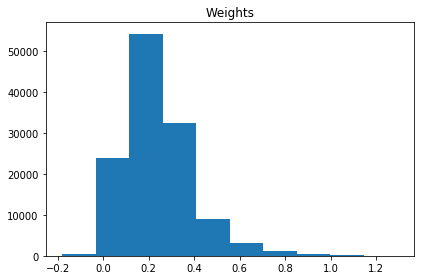

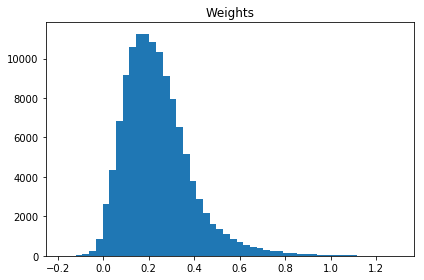

In [2]:
%matplotlib inline
from maybrain.plotting import histograms as hh

fig, _ = hh.plot_weight_distribution(a)
# You can define the number of bins, instead of using matplotlib automatic ones
fig2, _ = hh.plot_weight_distribution(a, bins=50)

In [3]:
# Closing them
plt.close(fig)
plt.close(fig2)

## The `plotting.matrices` module

When you have many brains, you can average all the `adjMat`s and have an averaged strength matrix. Maybrain can calculate and plot that matrix with the `plot_avg_matrix()` function. You just have to pass a dictionary with all the brains.

In our next example we will create a dictionary with just two repeated brains, which practically means nothing, but shows how the function works. The image is very small here in the notebook but if you choose to write the plot to a pdf file (eg. pass an argument `output_file="file.pdf"`), maybrain will create a pdf file and you can zoom it. You will thus be able to see that the image has the information of the anatomical labels of each node (on the top and on the left). These labels are ordered first by their hemisphere in the brain, then by the lobe and then by the anatomical label. If you want, you have parameters to set up a matrix for brains with a size different of 500x500.

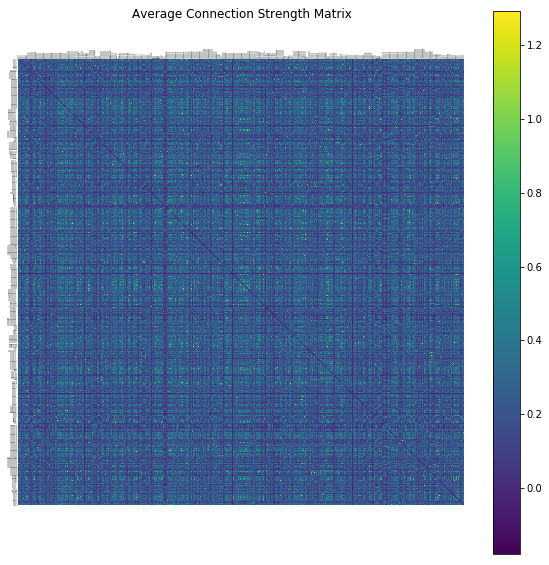

In [4]:
%matplotlib inline
from maybrain.plotting import matrices as mm

# Simple dictionary
dictionary = {0: a, 1: a}

fig, _ = mm.plot_avg_matrix(dictionary)

In [5]:
# Closing
plt.close(fig)

You also have the option to plot the `adjMat` of a single brain, with the function `plot_strength_matrix()`. The parameters you can pass to this function are similar to the previous one, with the difference that you can define a title to the plot.

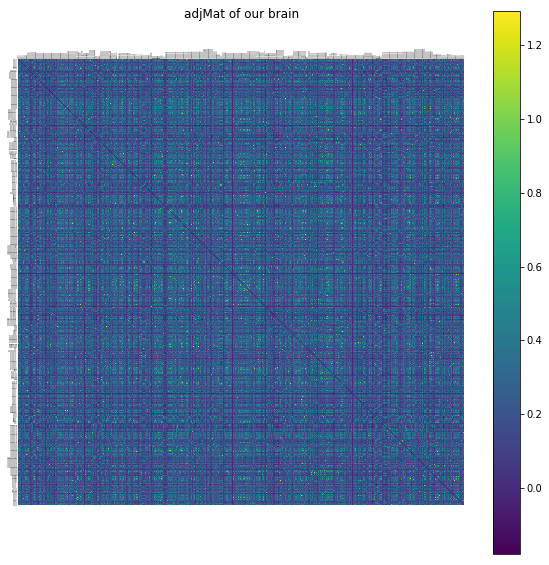

In [6]:
fig, _ = mm.plot_strength_matrix(a, title="adjMat of our brain")

In [7]:
# Closing
plt.close(fig)

## The `plotting.connectome` module

Maybrain as a wrapper over `nilearn` in order to visualise brains.

Let's start by applying a simple threshold of just 200 edges for easier visualisation:

In [8]:
%matplotlib inline
from maybrain.plotting import connectome as cc

a.local_thresholding(threshold_type="edgePC", value=0.5)

The basic usage of Maybrain's `plot_connectome` function is the following:

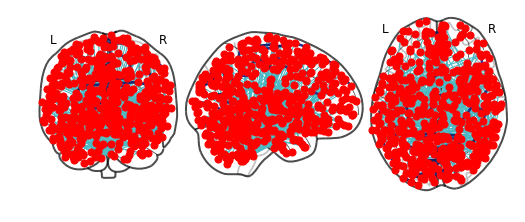

In [9]:
cc.plot_connectome(a)

You can see that by default `nilearn` plot is probably not the most adequate for our specific needs. Maybrain's `plot_connectome` allows customisation as you were using `nilearn`'s directly by providing a `kwargs` argument. In the following example you can see how it is possible to make our figure bigger, tell `nilearn` to show the colorbar on the right, and making the letters bigger by calling `annotate` on the returned display from nilearn.

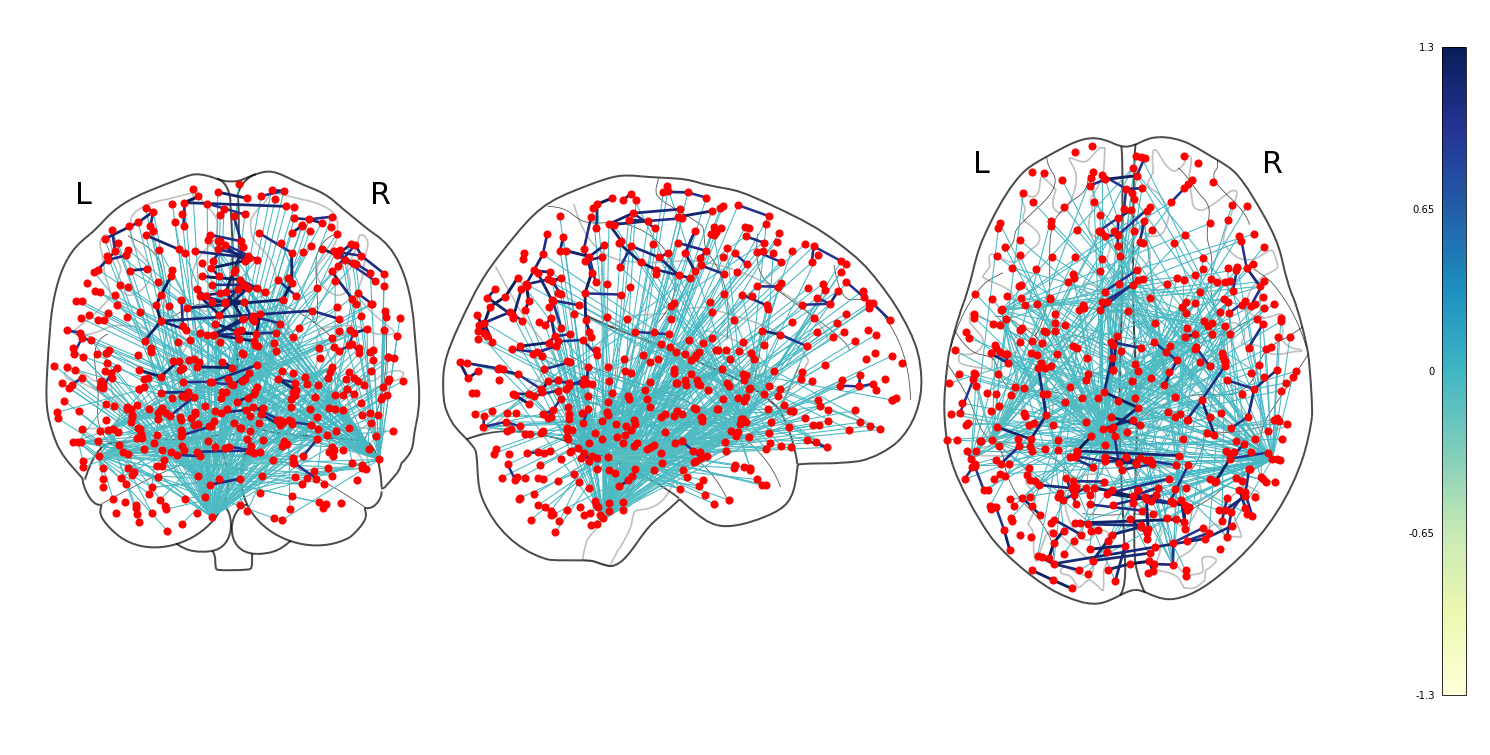

In [10]:
fig = plt.figure(figsize=(20,10))  # Making image bigger

display = cc.plot_connectome(a, figure=fig, colorbar=True)

display.annotate(size=30)

If you want to see the nodes only without edges, there is a boolean argument for that, `only_nodes`:

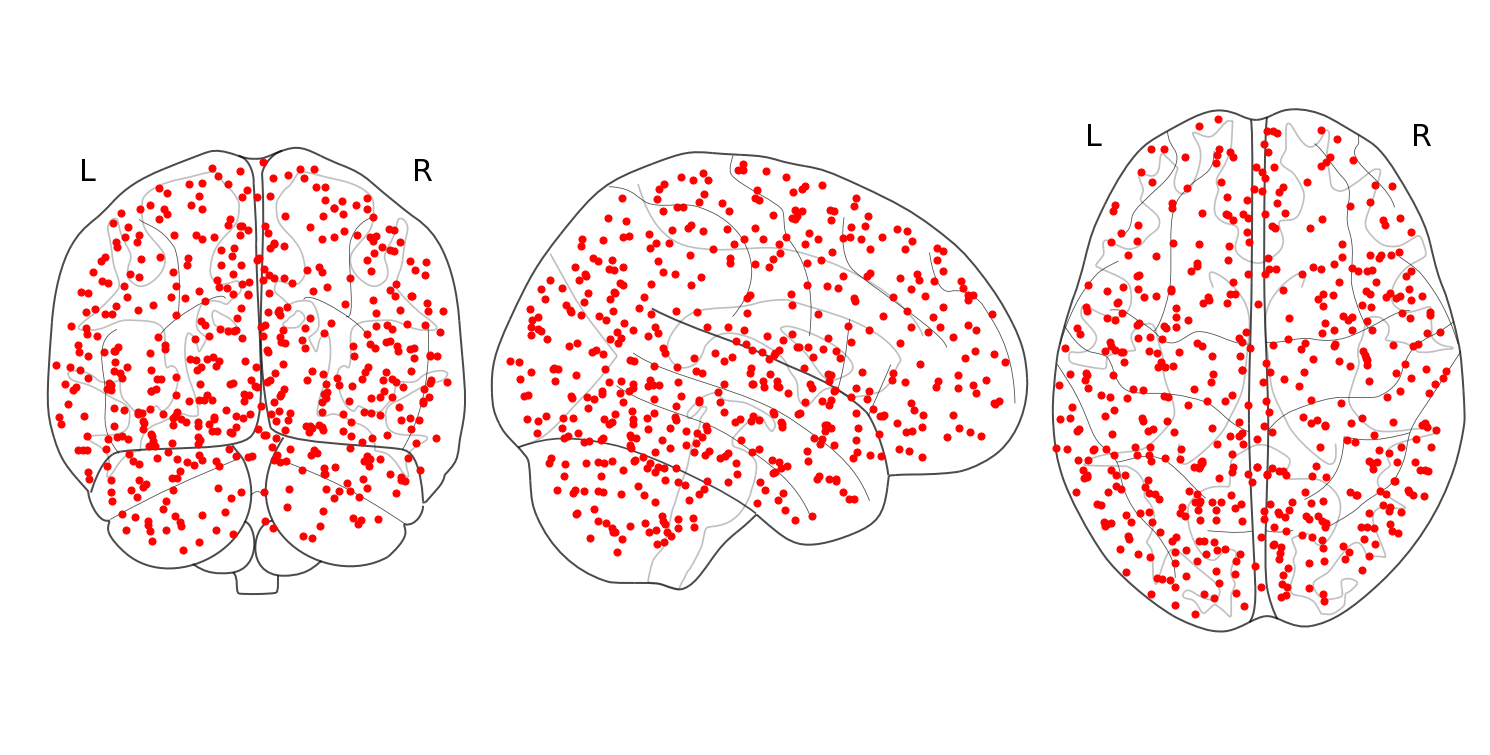

In [11]:
fig = plt.figure(figsize=(20,10))  # Making image bigger

display = cc.plot_connectome(a, figure=fig, only_nodes=True)

display.annotate(size=30)

You can make the colours of the nodes different according to the attributes for each. In the beginning of this notebook we loaded information about lobes and hemispheres, so let's visualise it.

In the next example we say that we want to colourise nodes according to the property `hemisphere`, and make different colours for when that property has the alue `R` or `L` in the node's attribute. You can see that the plot has some nodes with a different colour. That happens when the value in the specified property it's not equal no any of the values passed in `nodes_attributes`.

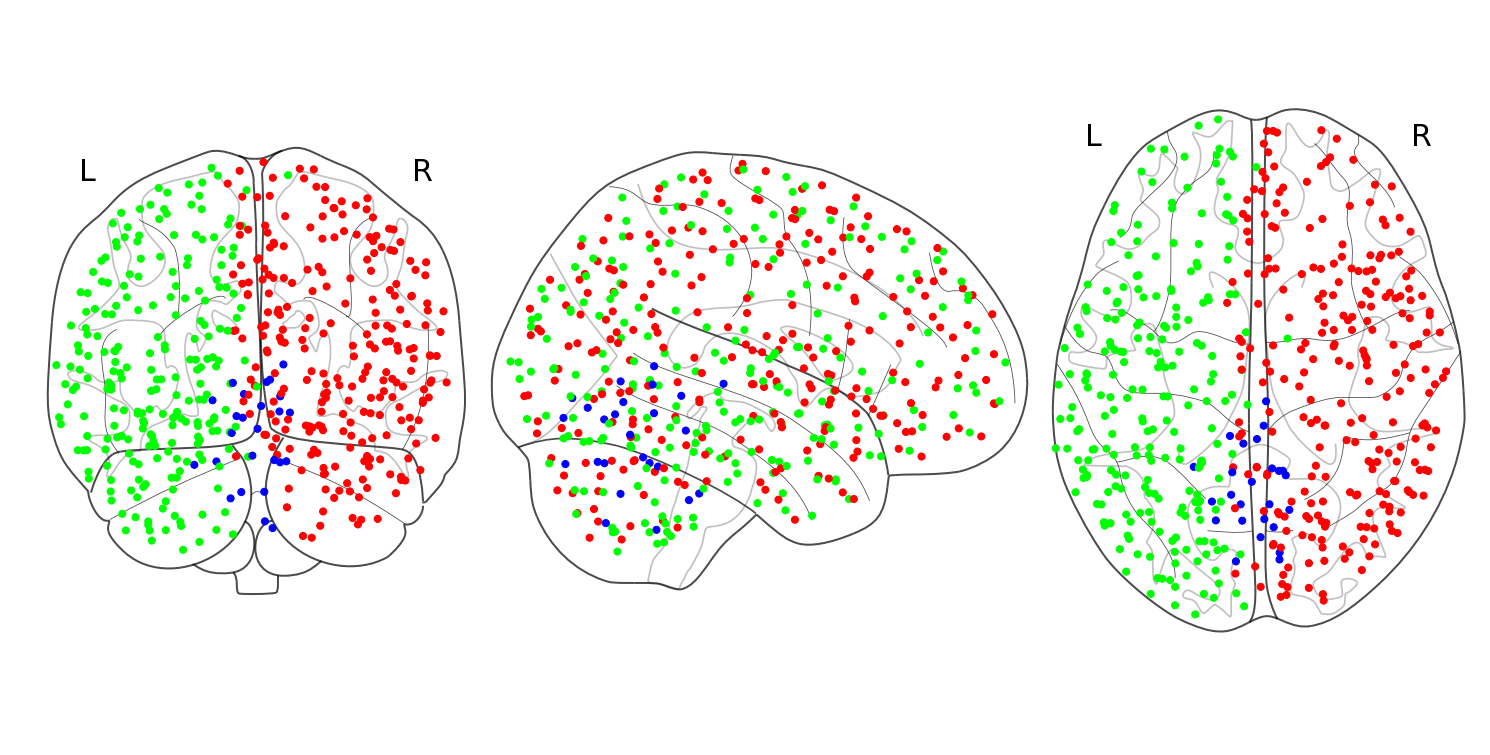

In [12]:
fig = plt.figure(figsize=(20,10))

attributes_to_plot = ["R", "L"]
display = cc.plot_connectome(a, 
                             figure=fig, 
                             node_property='hemisphere', 
                             node_attributes=attributes_to_plot, 
                             only_nodes=True)

display.annotate(size=30)

If you have more attributes to distinguish, more colours will be created:

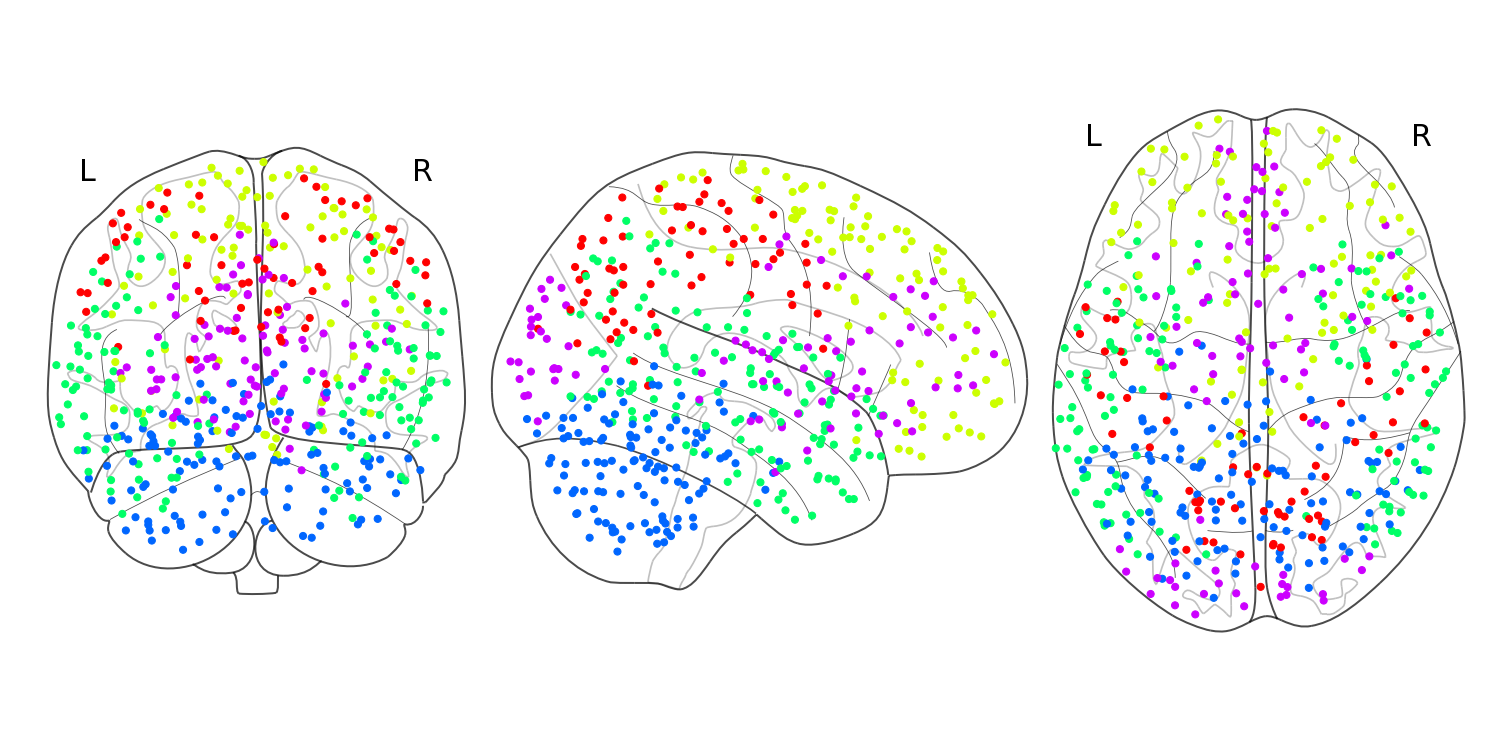

In [13]:
fig = plt.figure(figsize=(20,10))

attributes_to_plot = ["Parietal", "Frontal", "Temporal", "Cerebellum"]
display = cc.plot_connectome(a, 
                             figure=fig, 
                             node_property='lobe', 
                             node_attributes=attributes_to_plot, 
                             only_nodes=True)

display.annotate(size=30)